In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import sys
import os
import seaborn as sns

In [2]:
# Setup paths
ROOT_DIR = Path().resolve().parents[1]
DATA_R_DIR = ROOT_DIR / 'data' / 'data_raw'
DATA_DIR = ROOT_DIR / 'data'

In [3]:
os.chdir(ROOT_DIR)
print(ROOT_DIR)
from pipeline.extract import read_four_contaminants
from pipeline.tidy import tidy_raw_contaminant_data
from pipeline.transform import subset_sensors

/home/nick/bachelor-project/forecasting_smog_DL_GNN/src

Running __init__.py for data pipeline...
Pipeline initialized



In [4]:
YEAR = 2023

# Load in raw data

In [5]:
df_NO2_2016, df_PM10_2016, df_O3_2019, df_PM25_2019 = read_four_contaminants(year=YEAR, contaminants=['NO2', 'PM10', 'O3', 'PM25'])

In [6]:
contaminants = [df_NO2_2016, df_PM10_2016, df_O3_2019, df_PM25_2019]

## Amsterdam

In [7]:
VONDELPARK = 'NL49014'
VANDIEMEN = 'NL49012'
stations = [VONDELPARK, VANDIEMEN] 

In [8]:
tidy_contaminants = []

for contaminant in contaminants:
    tidy_contaminants.append(tidy_raw_contaminant_data(contaminant, year=YEAR))

In [9]:
tidy_NO2_2016, tidy_PM10_2016, tidy_O3_2016, _ = tidy_contaminants

Removed $\text{PM}_{2.5}$ as its not in 2016 data for VANDIEMEN station

In [10]:

subset_contaminants = []

for idx in range(len(tidy_contaminants) - 1):
    subset_contaminants.append(subset_sensors(tidy_contaminants[idx], stations))

In [11]:
sub_NO2_2016, sub_PM10_2016, sub_O3_2016 = subset_contaminants

In [12]:
print("NO2 missing vals:",sub_NO2_2016.isnull().sum())
print("PM10 missing vals:", sub_PM10_2016.isnull().sum())
print("O3 missing vals:",sub_O3_2016.isnull().sum())

NO2 missing vals: NL49012    0
NL49014    0
dtype: int64
PM10 missing vals: NL49012    0
NL49014    0
dtype: int64
O3 missing vals: NL49012    0
NL49014    0
dtype: int64


In [13]:
# how many 0s in series
print("NO2 0s:", (sub_NO2_2016 == 0).sum())
print("PM10 0s:", (sub_PM10_2016 == 0).sum())
print("O3 0s:", (sub_O3_2016 == 0).sum())
# sub_O3_2016.to_csv(DATA_DIR / 'data_test' / f'sub_O3_{YEAR}.csv')

NO2 0s: NL49012    0
NL49014    0
dtype: int64
PM10 0s: NL49012    0
NL49014    0
dtype: int64
O3 0s: NL49012    0
NL49014    0
dtype: int64


In [14]:
dict_subset = {'NO2': sub_NO2_2016, 'PM10': sub_PM10_2016, 'O3': np.log(sub_O3_2016)}

<Figure size 500x500 with 0 Axes>

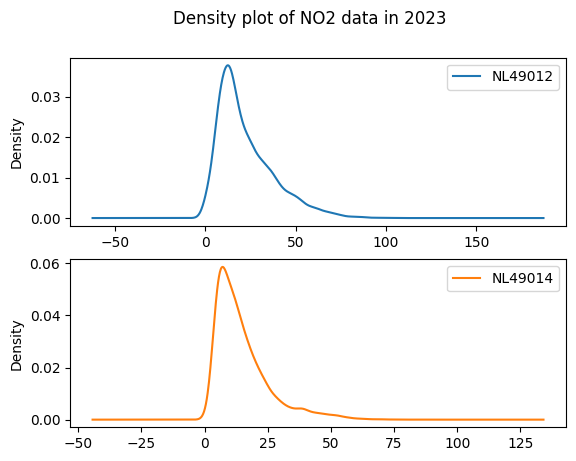

<Figure size 500x500 with 0 Axes>

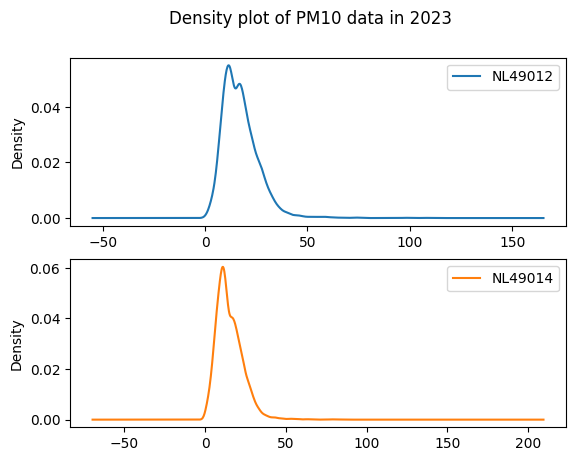

<Figure size 500x500 with 0 Axes>

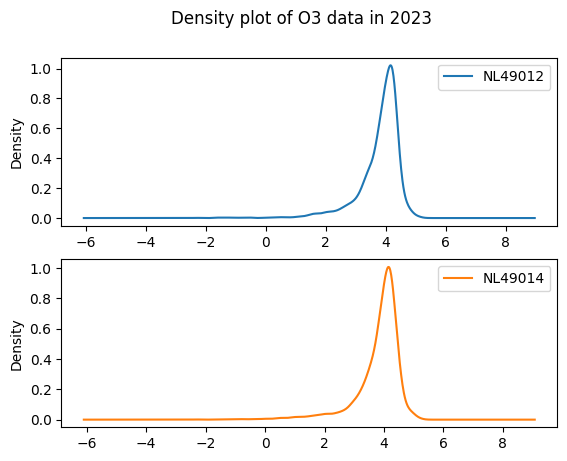

In [15]:
for key, data in dict_subset.items():
    plt.figure(figsize=(5, 5))
    data.plot(kind='density', subplots=True, sharex=False, legend=True)
    plt.suptitle(f'Density plot of {key} data in {YEAR}')
    plt.show()



## Shapes and other info

In [16]:
for key, data in dict_subset.items():
    print("Shape of", key,f"data for {YEAR}", data.shape)

Shape of NO2 data for 2023 (8712, 2)
Shape of PM10 data for 2023 (8712, 2)
Shape of O3 data for 2023 (8712, 2)


Throughout 2016-2023, all data has the same shape as expected, distributions are also approx. normal - and any and all missing values/neg vals/0 vals are fixed appropriately
- Ignore 2019 due to covid exclusion
- Ignore 2016 bc in utrecht theres no o3 data